In [1]:
#!pip install sentence_transformers

In [2]:
#!python -m spacy download el_core_news_md

In [3]:
'''from shutil import copyfile

copyfile(src = "/kaggle/input/trainer-am/stratification.py", dst = "../working/stratification.py")
copyfile(src = "/kaggle/input/trainer-am/kfold.py", dst = "../working/kfold.py")
copyfile(src = "/kaggle/input/trainer-am/trainer.py", dst = "../working/trainer.py")
copyfile(src = "/kaggle/input/trainer-am/visualizations.py", dst = "../working/visualizations.py")'''

'from shutil import copyfile\n\ncopyfile(src = "/kaggle/input/trainer-am/stratification.py", dst = "../working/stratification.py")\ncopyfile(src = "/kaggle/input/trainer-am/kfold.py", dst = "../working/kfold.py")\ncopyfile(src = "/kaggle/input/trainer-am/trainer.py", dst = "../working/trainer.py")\ncopyfile(src = "/kaggle/input/trainer-am/visualizations.py", dst = "../working/visualizations.py")'

In [4]:
from trainer import Trainer

C:\Users\Windows\anaconda3\envs\iliadSentimentAnalysis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
import matplotlib.pyplot as plt

# Setup

In [7]:
path = "data/iliad_sentiments.csv"
target = "class"

In [8]:
scenarios = {
    "TF-IDF sem lematização": {"lemmatize": False, "sbert": False},
#    "TF-IDF com lematização": {"lemmatize": True, "sbert": False},
#    "SBERT sem lematização": {"lemmatize": False, "sbert": True},
           }

classifiers = {
    "Decision Tree": DecisionTreeClassifier(), 
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

STANDARD = "Sem modificação"
WITHOUT_NARRATOR = "Sem narrador"
MERGE_NARRATOR_NEUTRAL = "Junção de narrador e neutro"

data_operations = [STANDARD, WITHOUT_NARRATOR, MERGE_NARRATOR_NEUTRAL]

nro_folds = 5

# Trainer

In [9]:
metrics = {}

for classifier in classifiers:  
    metrics[classifier] = {}
        
    for scenario in scenarios: 
        metrics[classifier][scenario] = {}

for classifier in classifiers:       
    for scenario in scenarios: 
        for operation in data_operations:
            trainer = Trainer(path, target)

            if operation == STANDARD:
                trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
            if operation == WITHOUT_NARRATOR:
                trainer.remove_class(["narrator"])
                trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
            elif operation == MERGE_NARRATOR_NEUTRAL:
                trainer.merge_class(["narrator"], "neutral")
                trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
                
            metrics[classifier][scenario][operation] = trainer.cross_validation(model=classifiers[classifier], nro_folds=nro_folds)
            print(f"{classifier} : {scenario} : {operation}")
            print(metrics[classifier][scenario][operation])
            print("=======================")


Decision Tree : TF-IDF sem lematização : Sem modificação
{'accuracy': [32.25806451612903, 38.21138211382114, 36.0655737704918, 37.704918032786885, 36.666666666666664], 'recall': [23.301812450748635, 26.959052589321526, 22.262100082034518, 26.169674596664006, 24.674791984061883], 'precision': [21.774661508704078, 25.12477718360068, 20.55380852550658, 25.23016437490125, 23.646574014221056], 'f1': [22.512367720277563, 26.009615358193873, 21.37387514794959, 25.691333082843844, 24.14974340573737]}
Decision Tree : TF-IDF sem lematização : Sem narrador
{'accuracy': [21.551724137931032, 27.82608695652174, 22.807017543859647, 14.035087719298245, 18.58407079646018], 'recall': [18.641975308641946, 24.90566037735856, 16.352201257861605, 14.842767295597467, 14.959568733153658], 'precision': [14.580235900485702, 16.68728097299523, 14.942528735632196, 12.71929824561406, 13.609529833438716], 'f1': [16.362811971790265, 19.98453290591537, 15.615615615615608, 13.699233371364526, 14.252651093955436]}
Deci

# Visualizations 

In [10]:
from visualizations import compare_boxplot

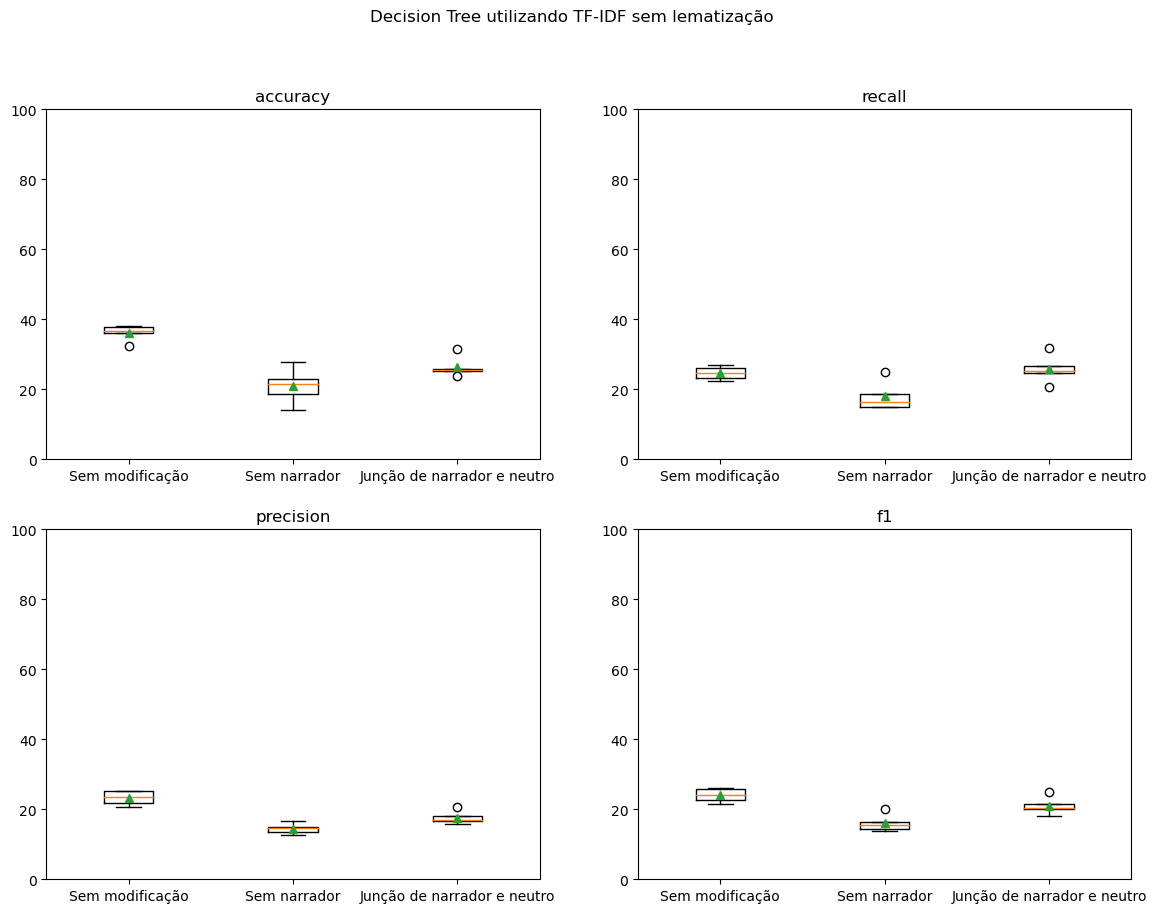

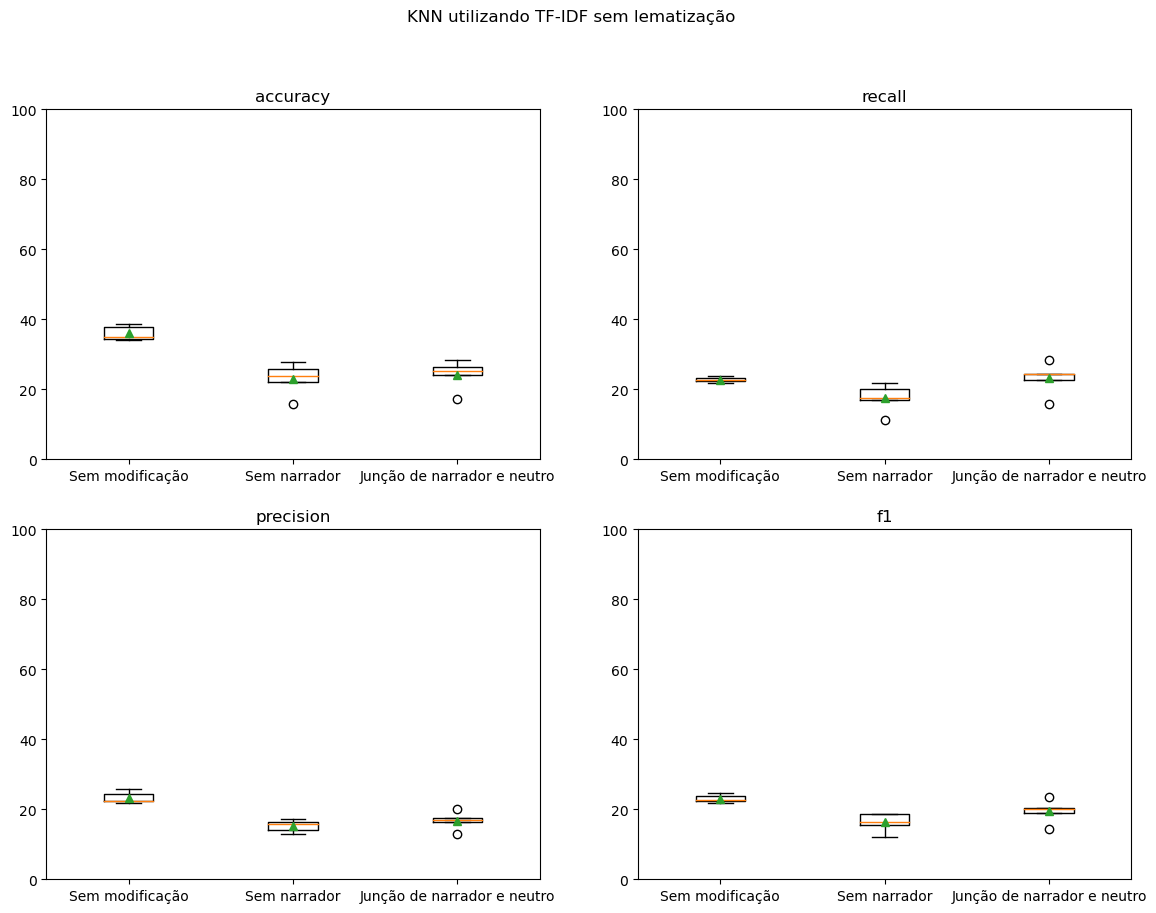

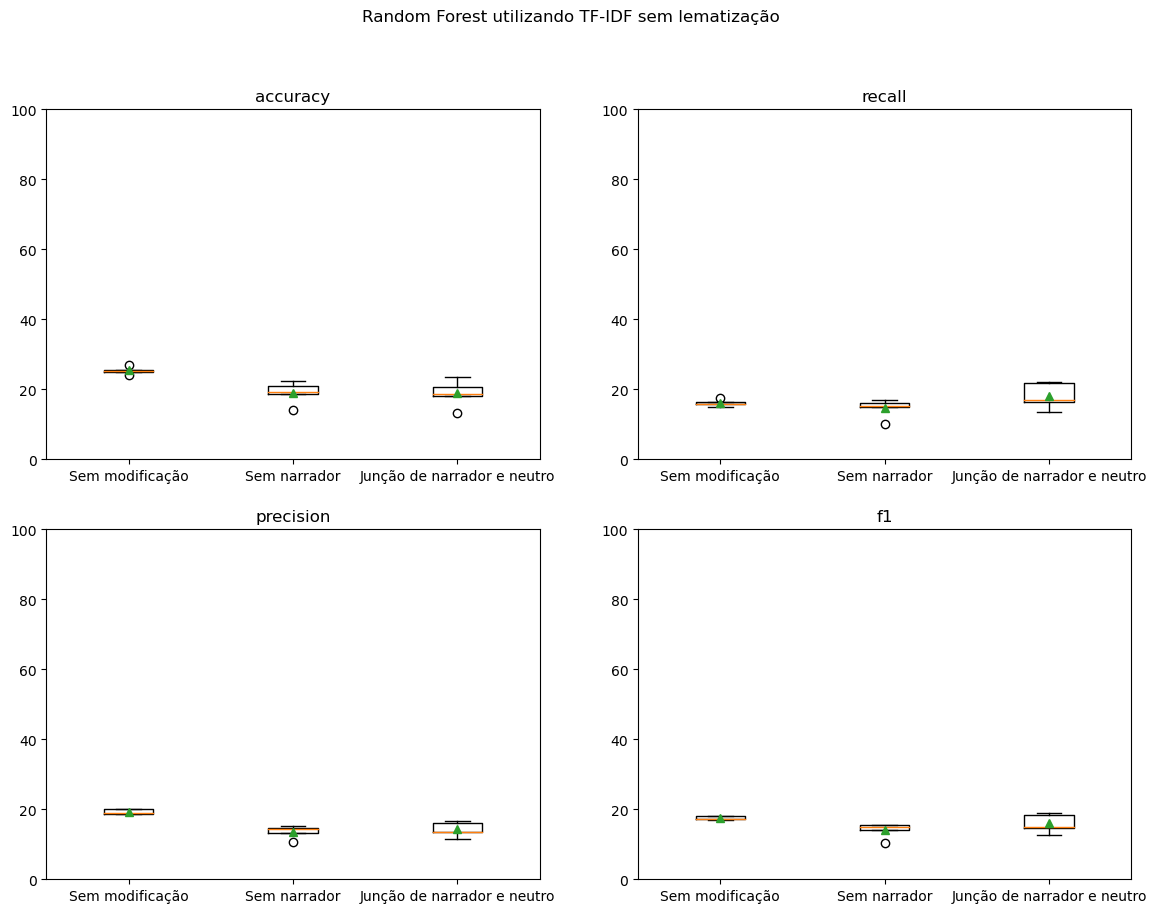

In [11]:
compare_boxplot(metrics, data_operations, width=14, height=10)

In [12]:
metrics

{'Decision Tree': {'TF-IDF sem lematização': {'Sem modificação': {'accuracy': [32.25806451612903,
     38.21138211382114,
     36.0655737704918,
     37.704918032786885,
     36.666666666666664],
    'recall': [23.301812450748635,
     26.959052589321526,
     22.262100082034518,
     26.169674596664006,
     24.674791984061883],
    'precision': [21.774661508704078,
     25.12477718360068,
     20.55380852550658,
     25.23016437490125,
     23.646574014221056],
    'f1': [22.512367720277563,
     26.009615358193873,
     21.37387514794959,
     25.691333082843844,
     24.14974340573737]},
   'Sem narrador': {'accuracy': [21.551724137931032,
     27.82608695652174,
     22.807017543859647,
     14.035087719298245,
     18.58407079646018],
    'recall': [18.641975308641946,
     24.90566037735856,
     16.352201257861605,
     14.842767295597467,
     14.959568733153658],
    'precision': [14.580235900485702,
     16.68728097299523,
     14.942528735632196,
     12.71929824561406,
   

In [13]:
data_operations

['Sem modificação', 'Sem narrador', 'Junção de narrador e neutro']